# User testing for for Scikit-Yellowbrick


### Using data that was recorded from sensors during Data Science Certificate Program at GW
https://github.com/georgetown-analytics/classroom-occupancy 

Data consist of temperature, humidity, CO2 levels, light, # of bluetooth devices, noise levels and count of people in the room.

In [19]:
import pandas as pd
%matplotlib inline

In [21]:
dataset = pd.read_csv('dataset.csv')

In [23]:
dataset.head(5)

,datetime,loc_CO2,temperature,humidity,co2,light,noise,bluetooth_devices,bluetooth_non_personal_devices,count_total
0,2017-03-25 09:05:58,Georgetown-manual,22.6,36.9,781.0,430.0,511.0,1.0,NaN,0.0
1,2017-03-25 09:06:04,Georgetown-manual,23.8,39.0,767.0,448.0,510.0,8.0,NaN,0.0
2,2017-03-25 09:06:10,Georgetown-manual,23.8,39.0,754.0,423.0,511.0,8.0,NaN,0.0
3,2017-03-25 09:06:15,Georgetown-manual,23.8,39.0,768.0,412.0,492.0,8.0,NaN,0.0
4,2017-03-25 09:06:21,Georgetown-manual,23.8,39.0,758.0,428.0,491.0,9.0,NaN,0.0


In [24]:
dataset.count_total.describe()

count    17962.000000
mean        24.647812
std         10.213500
min          0.000000
25%         25.000000
50%         29.000000
75%         31.000000
max         31.000000
Name: count_total, dtype: float64

In [25]:
#add a new column to create a binary class for room occupancy 
countmed = dataset.count_total.median()
dataset['room_occupancy'] = dataset['count_total'].apply(lambda x: 'occupied' if x > 4 else 'empty')

In [26]:
# map room occupancy to a number
dataset['room_occupancy_num'] = dataset.room_occupancy.map({'empty':0, 'occupied':1})

In [27]:
dataset.head(5)

,datetime,loc_CO2,temperature,humidity,co2,light,noise,bluetooth_devices,bluetooth_non_personal_devices,count_total,room_occupancy,room_occupancy_num
0,2017-03-25 09:05:58,Georgetown-manual,22.6,36.9,781.0,430.0,511.0,1.0,NaN,0.0,empty,0
1,2017-03-25 09:06:04,Georgetown-manual,23.8,39.0,767.0,448.0,510.0,8.0,NaN,0.0,empty,0
2,2017-03-25 09:06:10,Georgetown-manual,23.8,39.0,754.0,423.0,511.0,8.0,NaN,0.0,empty,0
3,2017-03-25 09:06:15,Georgetown-manual,23.8,39.0,768.0,412.0,492.0,8.0,NaN,0.0,empty,0
4,2017-03-25 09:06:21,Georgetown-manual,23.8,39.0,758.0,428.0,491.0,9.0,NaN,0.0,empty,0


In [28]:
dataset.room_occupancy.describe()

count        17962
unique           2
top       occupied
freq         15859
Name: room_occupancy, dtype: object

In [29]:
import os
import sys 

# Modify the path 
sys.path.append("..")

import pandas as pd
import yellowbrick as yb 
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12, 8)

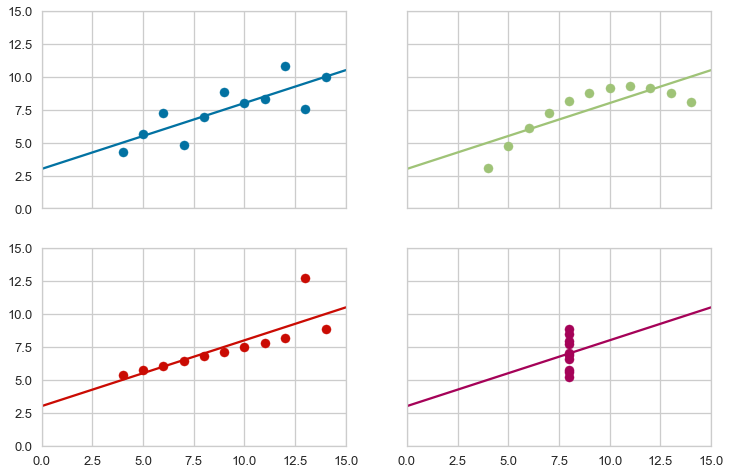

In [30]:
g = yb.anscombe()

## Feature Analysis

Feature analysis visualizers are designed to visualize instances in data space in order to detect features or targets that might impact downstream fitting. Because ML operates on high-dimensional data sets (usually at least 35), the visualizers focus on aggregation, optimization, and other techniques to give overviews of the data. It is our intent that the steering process will allow the data scientist to zoom and filter and explore the relationships between their instances and between dimensions.

At the moment we have three feature analysis visualizers implemented:

Rank2D: rank pairs of features to detect covariance

RadViz: plot data points along axes ordered around a circle to detect separability

Parallel Coordinates: plot instances as lines along vertical axes to detect clusters

Feature analysis visualizers implement the Transformer API from Scikit-Learn, meaning they can be used as intermediate transform steps in a Pipeline (particularly a VisualPipeline). They are instantiated in the same way, and then fit and transform are called on them, which draws the instances correctly. Finally show or show is called which displays the image.

In [63]:
from yellowbrick.features.rankd import Rank2D 
from yellowbrick.features.radviz import RadViz 
from yellowbrick.features.pcoords import ParallelCoordinates

### Rank2D

Rank1D and Rank2D evaluate single features or pairs of features using a variety of metrics that score the features on the scale [-1, 1] or [0, 1] allowing them to be ranked. A similar concept to SPLOMs, the scores are visualized on a lower-left triangle heatmap so that patterns between pairs of features can be easily discerned for downstream analysis.

In [32]:
# Load the classification data set
data = dataset

# Specify the features of interest
features = ['temperature','humidity','co2','light','noise','bluetooth_devices']

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data['count_total'].as_matrix()

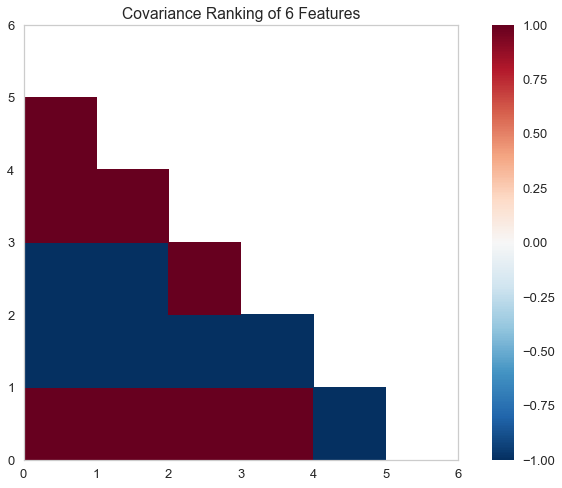

In [33]:
# Instantiate the visualizer with the Covariance ranking algorithm 
visualizer = Rank2D(features=features, algorithm='covariance')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.show()                   # Draw/show/show the data

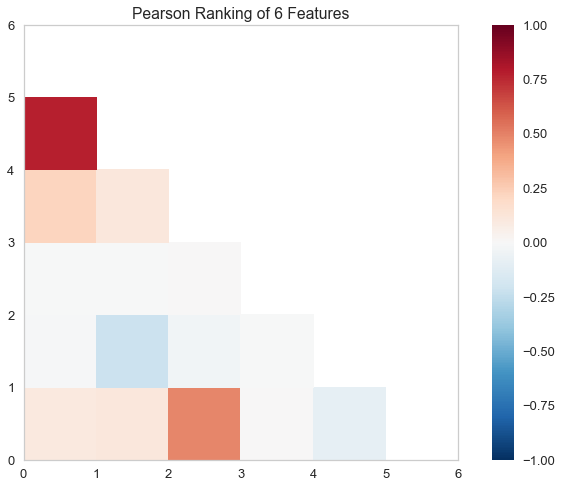

In [34]:
# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(features=features, algorithm='pearson')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.show()                   # Draw/show/show the data

### RadViz

RadViz is a multivariate data visualization algorithm that plots each feature dimension uniformely around the circumference of a circle then plots points on the interior of the circle such that the point normalizes its values on the axes from the center to each arc. This meachanism allows as many dimensions as will easily fit on a circle, greatly expanding the dimensionality of the visualization.
Data scientists use this method to dect separability between classes. E.g. is there an opportunity to learn from the feature set or is there just too much noise?

In [35]:
# Specify the features of interest and the classes of the target 
features = ['temperature','humidity','co2','light','noise','bluetooth_devices']
classes = ['empty', 'occupied']

# Extract the numpy arrays from the data frame 
X = data[features].as_matrix()
y = data.room_occupancy_num.as_matrix()

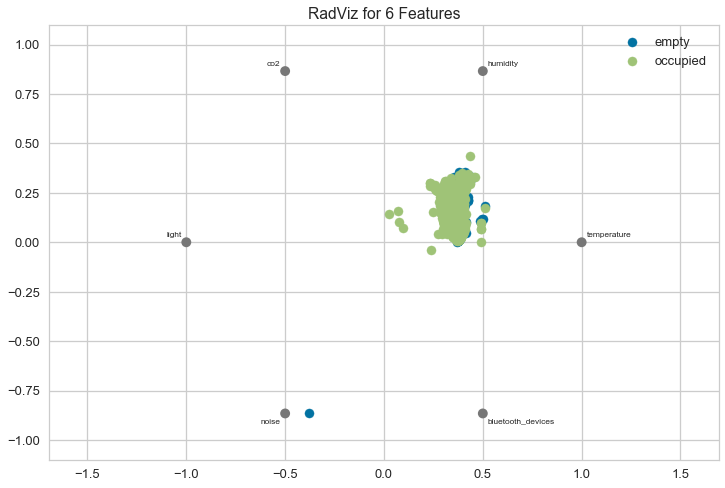

In [36]:
# Instantiate the visualizer
visualizer = visualizer = RadViz(classes=classes, features=features)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.show()         # Draw/show/show the data

For regression, the RadViz visualizer should use a color sequence to display the target information, as opposed to discrete colors.

## Parallel Coordinates

### !!! On this step notebook crashes and has to be restarted

In [ ]:
# Specify the features of interest and the classes of the target 
#features = ['temperature','humidity','co2','light','noise','bluetooth_devices']
#classes = ['empty', 'occupied']

# Extract the numpy arrays from the data frame 
#X = data[features].as_matrix()
#y = data.room_occupancy_num.as_matrix()

In [ ]:
# Instantiate the visualizer
#visualizer = visualizer = ParallelCoordinates(classes=classes, features=features)

#visualizer.fit(X, y)      # Fit the data to the visualizer
#visualizer.transform(X)   # Transform the data
#visualizer.show()         # Draw/show/show the data

## Regressor Evaluation

Regression models attempt to predict a target in a continuous space. Regressor score visualizers display the instances in model space to better understand how the model is making predictions. We currently have implemented two regressor evaluations:

Residuals Plot: plot the difference between the expected and actual values

Prediction Error: plot expected vs. the actual values in model space

Estimator score visualizers wrap Scikit-Learn estimators and expose the Estimator API such that they have fit(), predict(), and score() methods that call the appropriate estimator methods under the hood. Score visualizers can wrap an estimator and be passed in as the final step in a Pipeline or VisualPipeline.

In [40]:
# Regression Evaluation Imports 

from sklearn.linear_model import Ridge, Lasso 
from sklearn.model_selection import train_test_split

from yellowbrick.regressor import PredictionError, ResidualsPlot

### Residuals Plot

A residual plot shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

In [46]:
# Load the data
df = data
feature_names = ['temperature','humidity','co2','light','noise','bluetooth_devices']
target_name = 'count_total'

# Get the X and y data from the DataFrame 
X = df[feature_names].as_matrix()
y = df[target_name].as_matrix() 

# Create the train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

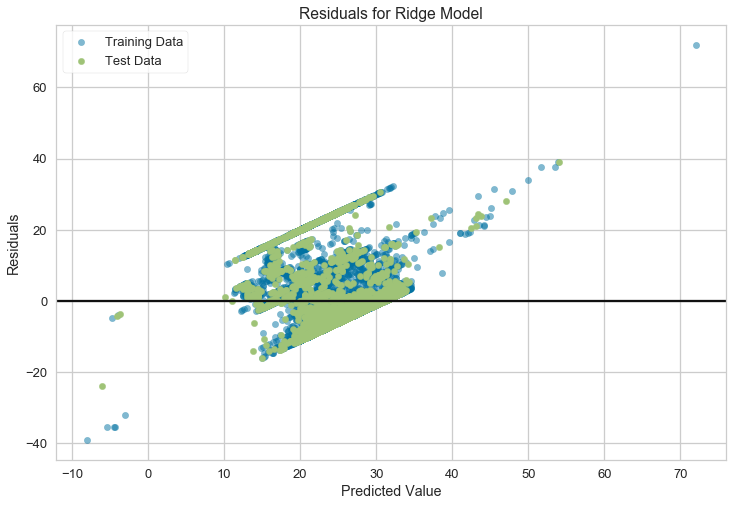

In [47]:
# Instantiate the linear model and visualizer 
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.show()             # Draw/show/show the data

### Prediction Error Plot

Plots the actual targets from the dataset against the predicted values generated by our model. This allows us to see how much variance is in the model. Data scientists diagnose this plot by comparing against the 45 degree line, where the prediction exactly matches the model.

In [54]:
# Load the data
df = data
feature_names = ['temperature','humidity','co2','light','noise','bluetooth_devices']
target_name = 'count_total'

# Get the X and y data from the DataFrame 
X = df[feature_names].as_matrix()
y = df[target_name].as_matrix() 

# Create the train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

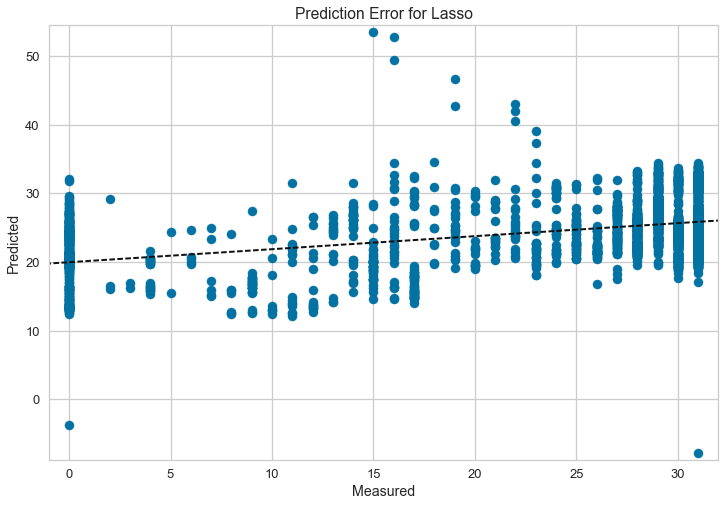

In [55]:
# Instantiate the linear model and visualizer 
lasso = Lasso()
visualizer = PredictionError(lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.show()             # Draw/show/show the data

## Classifier Evaluation

Classification models attempt to predict a target in a discrete space, that is assign an instance of dependent variables one or more categories. Classification score visualizers display the differences between classes as well as a number of classifier-specific visual evaluations. We currently have implemented three classifier evaluations:

ClassificationReport: Presents the confusion matrix of the classifier as a heatmap

ROCAUC: Presents the graph of receiver operating characteristics along with area under the curve

ClassBalance: Displays the difference between the class balances and support

Estimator score visualizers wrap Scikit-Learn estimators and expose the Estimator API such that they have fit(), predict(), and score() methods that call the appropriate estimator methods under the hood. Score visualizers can wrap an estimator and be passed in as the final step in a Pipeline or VisualPipeline.

In [56]:
# Classifier Evaluation Imports 

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ClassificationReport, ROCAUC, ClassBalance

### Classification report

The classification report visualizer displays the precision, recall, and F1 scores for the model. Integrates numerical scores as well color-coded heatmap in order for easy interpretation and detection.

In [57]:
# Load the classification data set
data = dataset

# Specify the features of interest and the classes of the target 
features = ['temperature','humidity','co2','light','noise','bluetooth_devices']
classes = ['empty', 'occupied']

# Extract the numpy arrays from the data frame 
X = data[features].as_matrix()
y = data.room_occupancy_num.as_matrix()

# Create the train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

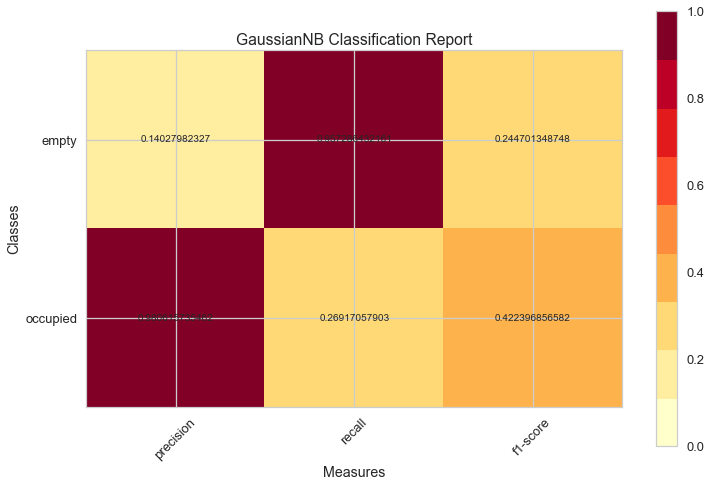

In [58]:
# Instantiate the classification model and visualizer 
bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.show()             # Draw/show/show the data

### ROCAUC

Plot the ROC to visualize the tradeoff between the classifier's sensitivity and specificity.

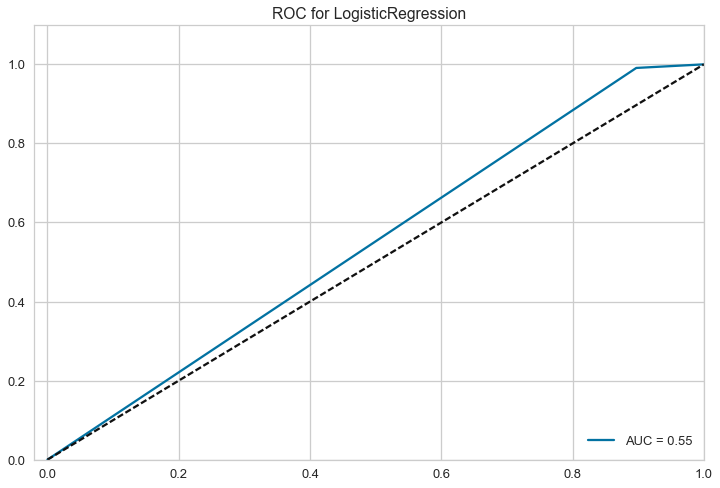

In [59]:
# Instantiate the classification model and visualizer 
logistic = LogisticRegression()
visualizer = ROCAUC(logistic)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.show()             # Draw/show/show the data

### ClassBalance

Class balance chart that shows the support for each class in the fitted classification model.

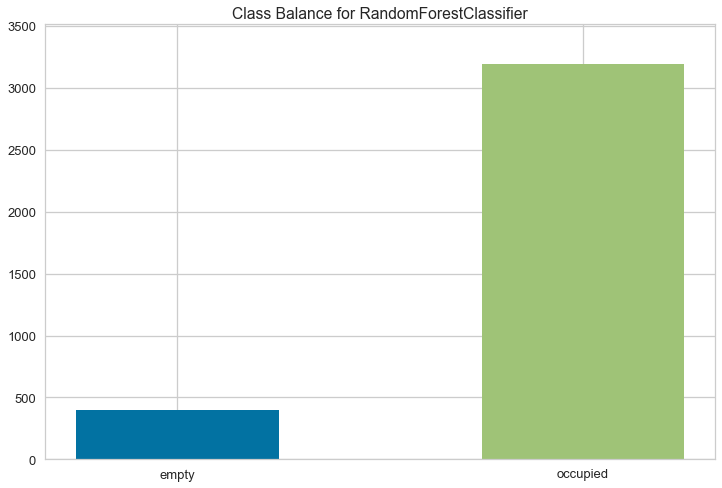

In [60]:
# Instantiate the classification model and visualizer 
forest = RandomForestClassifier()
visualizer = ClassBalance(forest, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.show()             # Draw/show/show the data